In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../original_data/youtube_musicvideo_countries_daily_increasedviews.csv")

In [3]:
df

,artist_id,artist_name,country,date,inc
0,1,카더가든,Italy,20210418,13
1,1,카더가든,Egypt,20210418,10
2,1,카더가든,Türkiye,20210418,94
3,1,카더가든,Saudi Arabia,20210418,23
4,1,카더가든,United Kingdom,20210418,58
...,...,...,...,...,...
32236006,2712,티아이오티 (TIOT),Canada,20230930,15
32236007,2712,티아이오티 (TIOT),United States,20230930,86
32236008,2712,티아이오티 (TIOT),Mexico,20230930,10
32236009,2712,티아이오티 (TIOT),Argentina,20230930,104


In [4]:
df[df['artist'].str.contains('BTS', case=False, na=False)]['artist'].unique()


array(['인더섬 with BTS'], dtype=object)

In [5]:
df[df['artist'].str.contains('방탄', case=False, na=False)]['artist'].unique()


array(['방탄소년단', '방탄소년단|정국|Charlie Puth', '방탄소년단|benny blanco|Snoop Dogg',
       '방탄소년단|정국'], dtype=object)

In [6]:
df_BTS = df[df['artist'] == '방탄소년단']
df_BTS

,song_id,song,artist_id,artist,url,date,viewcount
183,602,봄날,273,방탄소년단,https://www.youtube.com/watch?v=xEeFrLSkMm8,20190607,261739177
185,6089,작은 것들을 위한 시 (Boy With Luv) feat. Halsey,273,방탄소년단,https://www.youtube.com/watch?v=XsX3ATc3FbA,20190607,357969275
282,355,N.O,273,방탄소년단,https://www.youtube.com/watch?v=mmgxPLLLyVo,20190607,69360335
294,513,Save ME,273,방탄소년단,https://www.youtube.com/watch?v=GZjt_sA2eso,20190607,394586410
502,638,Come Back Home,273,방탄소년단,https://www.youtube.com/watch?v=2vJFn10XLQM,20190607,16128410
...,...,...,...,...,...,...,...
10835531,487,RUN,273,방탄소년단,https://www.youtube.com/watch?v=5Wn85Ge22FQ,20230930,177039118
10835907,384,상남자 (Boy In Luv),273,방탄소년단,https://www.youtube.com/watch?v=V7RL1V15OTY,20230930,7933124
10836959,565,MAMA,273,방탄소년단,https://www.youtube.com/watch?v=wu82g0vyyTY,20230930,9469613
10837416,563,First Love,273,방탄소년단,https://www.youtube.com/watch?v=7VPcnJ9oJ-k,20230930,9868074


In [7]:
# Filter the date column ending with '01'
df_BTS = df_BTS[df_BTS['date'].astype(str).str.endswith('01')]
#이따가 월별 수출 데이터와 비교하기 위해 01일로 끝나는 데이터만 추출했는데(monthly로 전환), 뾰족한 점이 사라졌다!
#01일로 끝나는 데이터만 추출하는 게 아니라 한 달의 데이터를 모두 합쳐야 한다

# Sum up viewcounts for each date
df_BTS['date_formatted'] = pd.to_datetime(df_BTS['date'], format='%Y%m%d')
df_BTS_summed = df_BTS.groupby('date_formatted')['viewcount'].sum().reset_index()

# Create new dataframe with datetime column and summed viewcount column
df_BTS_new = pd.DataFrame({'date': df_BTS_summed['date_formatted'], 'viewcount': df_BTS_summed['viewcount']})
df_BTS_new


/var/folders/4t/lj2jkv114_3c4yz5pdp55ws80000gn/T/ipykernel_56208/99354988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BTS['date_formatted'] = pd.to_datetime(df_BTS['date'], format='%Y%m%d')


,date,viewcount
0,2019-07-01,6477148155
1,2019-08-01,6717266796
2,2019-09-01,7721437982
3,2019-10-01,7912722548
4,2019-11-01,8115252530
5,2019-12-01,8285849107
6,2020-01-01,8385278366
7,2020-02-01,8602910649
8,2020-03-01,8871782272
9,2020-04-01,9134107244


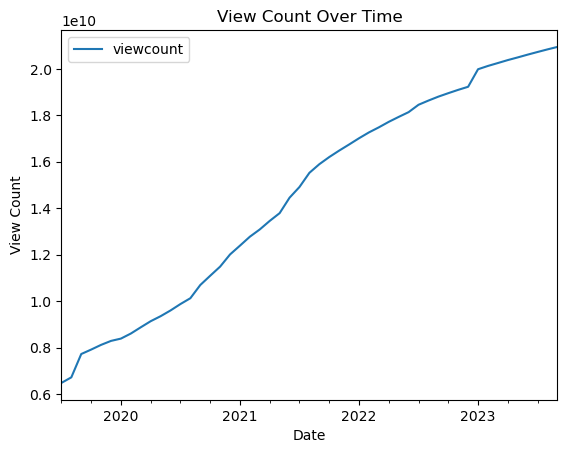

In [8]:
df_BTS_new.plot(x='date', y='viewcount', kind='line')
plt.xlabel('Date')
plt.ylabel('View Count')
plt.title('View Count Over Time')
plt.show()


In [9]:
# Calculate the monthly increment of view count
# Do the integer calculation for the viewcount

df_BTS_new['viewcount_increment'] = df_BTS_new['viewcount'].diff().fillna(0).astype(int)
df_BTS_new

,date,viewcount,viewcount_increment
0,2019-07-01,6477148155,0
1,2019-08-01,6717266796,240118641
2,2019-09-01,7721437982,1004171186
3,2019-10-01,7912722548,191284566
4,2019-11-01,8115252530,202529982
5,2019-12-01,8285849107,170596577
6,2020-01-01,8385278366,99429259
7,2020-02-01,8602910649,217632283
8,2020-03-01,8871782272,268871623
9,2020-04-01,9134107244,262324972


In [10]:
#drop the first row
df_BTS_new = df_BTS_new[1:]
df_BTS_new

,date,viewcount,viewcount_increment
1,2019-08-01,6717266796,240118641
2,2019-09-01,7721437982,1004171186
3,2019-10-01,7912722548,191284566
4,2019-11-01,8115252530,202529982
5,2019-12-01,8285849107,170596577
6,2020-01-01,8385278366,99429259
7,2020-02-01,8602910649,217632283
8,2020-03-01,8871782272,268871623
9,2020-04-01,9134107244,262324972
10,2020-05-01,9349301711,215194467


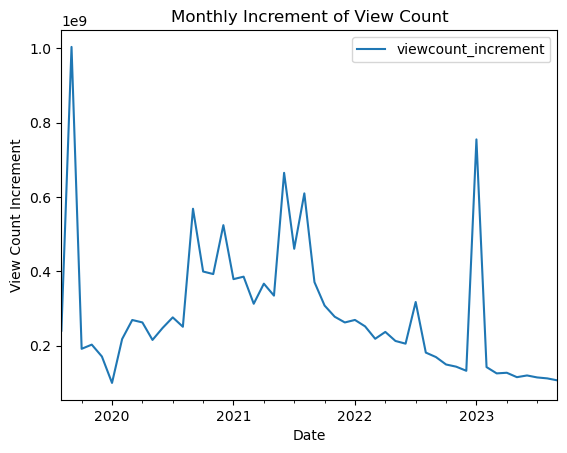

In [11]:

# Plot the monthly increment of view count in Japan

"""
df_BTS_new.plot(x='date', y='viewcount_increment', kind='line')
plt.xlabel('Date')
plt.ylabel('View Count Increment')
plt.title('Monthly Increment of View Count')
plt.show()
"""


In [13]:
df_album = pd.read_csv("../album_data_23/df_reconstructed.csv")
df_album['Date'] = pd.to_datetime(df_album['Date'])
df_album

,Date,Country,ISO_Code,Continent,Export,Import,Balance
0,2015-01-01,Netherlands,NL,Europe,0,6,-6
1,2015-01-01,Taiwan,TW,East Asia,121,0,121
2,2015-01-01,Germany,DE,Europe,3,175,-172
3,2015-01-01,USA,US,North America,34,65,-32
4,2015-01-01,Spain,ES,Europe,0,0,0
...,...,...,...,...,...,...,...
2277,2023-12-01,Canada,CA,North America,315,1,315
2278,2023-12-01,Thailand,TH,S Asia & Oceania,78,0,78
2279,2023-12-01,France,FR,Europe,284,2,283
2280,2023-12-01,Australia,AU,S Asia & Oceania,138,0,138


In [14]:
filtered_JP_df = df_album[(df_album['Date'] >= '2019-08') & (df_album['Date'] <= '2023-09') & (df_album['Country'] == 'Japan')]
filtered_JP_df = pd.DataFrame({'date': filtered_JP_df['Date'], 'export': filtered_JP_df['Export']})
filtered_JP_df.reset_index(drop=True, inplace=True)
filtered_JP_df


,date,export
0,2019-08-01,1934
1,2019-09-01,6881
2,2019-10-01,2798
3,2019-11-01,2291
4,2019-12-01,1412
5,2020-01-01,3852
6,2020-02-01,6137
7,2020-03-01,2588
8,2020-04-01,1912
9,2020-05-01,2415


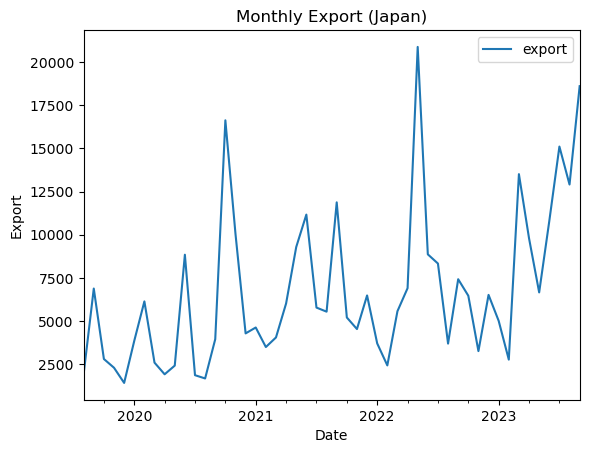

In [15]:
filtered_JP_df.plot(x='date', y='export', kind='')
plt.xlabel('Date')
plt.ylabel('Export')
plt.title('Monthly Export (Japan)')
plt.show()


In [118]:
X = df_BTS_new['viewcount_increment'].values.reshape(-1, 1)

In [119]:
Y = filtered_JP_df['export'].values.reshape(-1, 1)

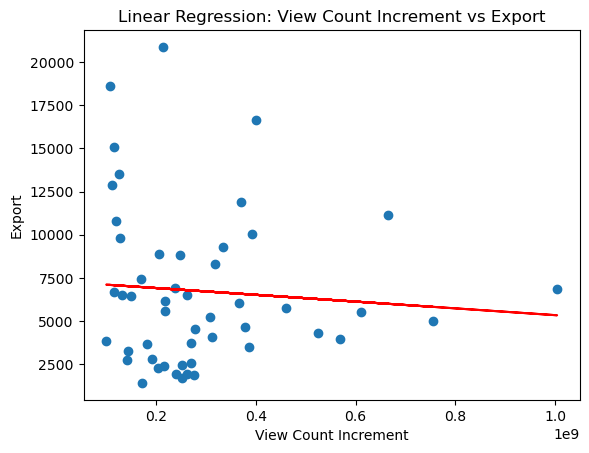

In [123]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model with X and Y
model.fit(X, Y)

# Predict Y values using the model
Y_pred = model.predict(X)

# Plot the linear regression line
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('View Count Increment')
plt.ylabel('Export')
plt.title('Linear Regression: View Count Increment vs Export')
plt.show()
